In [68]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from pymongo import MongoClient


In [31]:
# Load the dataset
client = MongoClient("localhost", 27017)
db = client["IF29"]
collec = db.user_db_V1
original = pd.DataFrame(list(collec.find()))

In [90]:
data = original.sample(frac=0.04, random_state=42)

In [91]:
data.shape

(73738, 21)

In [92]:
# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Aggressivity', 'visibility']])

In [95]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.10, min_samples=200)  # You may need to tune the parameters
labels = dbscan.fit_predict(data_scaled)

In [96]:
data["label"] = labels
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7], dtype=int64)

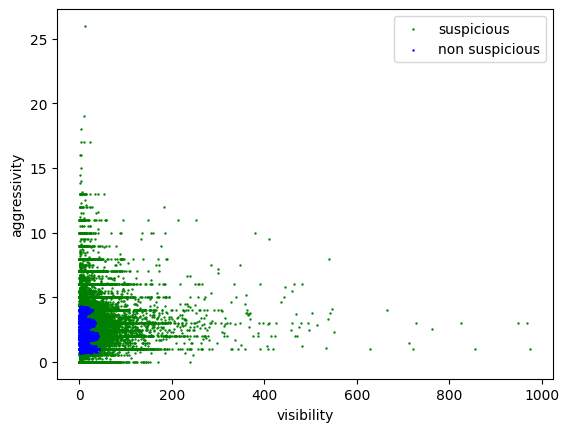

In [97]:
import matplotlib.pyplot as plt

for label in data["label"]:
    plt.scatter(
        data.visibility[label],
        data.Aggressivity[label],
        s=0.5,
        c="green",
        label="suspicious",
    )


plt.scatter(
    data.visibility[data["label"] != 0],
    data.Aggressivity[data["label"] != 0],
    s=0.5,
    c="green",
    label="suspicious",
)
plt.scatter(
    data.visibility[data["label"] == 0],
    data.Aggressivity[data["label"] == 0],
    s=0.5,
    c="blue",
    label="non suspicious",
)


plt.legend()
plt.xlabel("visibility")
plt.ylabel("aggressivity")
plt.show()

In [45]:
#Export the collection to mongo
#db.user_label_DBSCAN.drop()
db.create_collection("user_label_DBSCAN")
db.user_label_DBSCAN.insert_many(data.to_dict('records'))

InsertManyResult([4079898737, 999389525028888577, 726179508307525632, 150809678, 801516335922548736, 811887739478179840, 3095151827, 2726236684, 852012337691152384, 302225363, 127852734, 281218073, 273678023, 3344165559, 2944848154, 724814613917908992, 101512668, 991300195488030721, 18734070, 135108603, 255282734, 2280553695, 1006552663062929413, 896067120282431489, 307383341, 70726390, 52470194, 312616250, 116396244, 1551503983, 347239886, 2866898293, 2760340005, 541973562, 86659173, 528267606, 353482129, 240085222, 957349684103794688, 3987381773, 2732491157, 155384384, 437083763, 276786142, 380595233, 134548681, 1004656747703828481, 895364550152859649, 328964905, 623535633, 848748074574815232, 382091967, 586126980, 715276862663077888, 581095858, 3103724398, 225913335, 2829986292, 4494129556, 3129331093, 845614362383417344, 282486490, 2998241361, 3921780455, 198625405, 829079016892047360, 772032635455479808, 1177408524, 354569954, 56235675, 945221586357014528, 2995310762, 4883889555, 

In [46]:
# Add the labels to the DataFrame
data['label'] = labels

# Convert DBSCAN labels to your desired labels (0, 1, 2)
data['profile_label'] = data['label'].apply(lambda x: 0 if x != -1 else 2)

# For undefined category (label 1), you might need additional criteria. Here we keep it simple:
data['profile_label'] = data.apply(lambda row: 1 if row['label'] == -1 and np.mean(row[['aggressivity', 'visibility']]) < 0.5 else row['profile_label'], axis=1)


#Export the collection to mongo
db.user_label_DBSCAN.drop()
db.create_collection("user_label_DBSCAN")
db.user_label_DBSCAN.insert_many(data.to_dict('records'))

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(data['aggressivity'], data['visibility'], c=data['profile_label'], cmap='viridis', marker='o', alpha=0.6)
plt.colorbar(ticks=[0, 1, 2], label='Profile Label')
plt.xlabel('Aggressivity')
plt.ylabel('Visibility')
plt.title('User Profile Classification')
plt.show()

KeyError: "['aggressivity'] not in index"